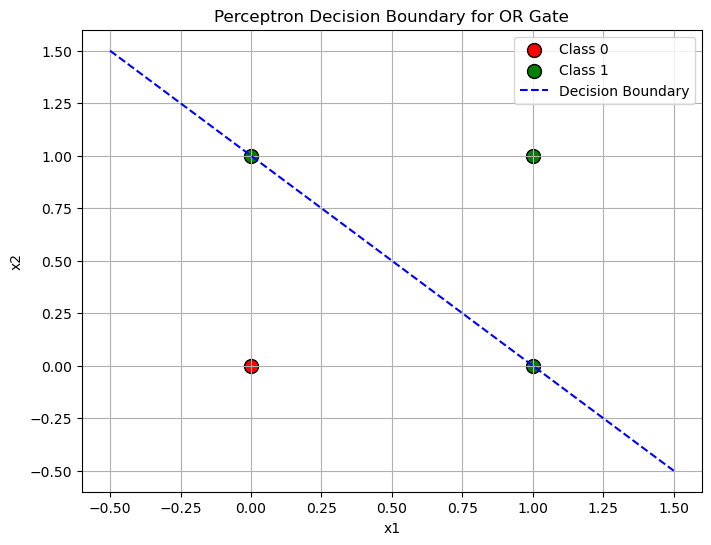

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step activation function
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.lr = learning_rate
        self.epochs = epochs

    def predict(self, x):
        return step_function(np.dot(self.weights, x) + self.bias)

    def train(self, X, y):
        for epoch in range(self.epochs):
            for xi, target in zip(X, y):
                y_hat = self.predict(xi)
                error = target - y_hat
                self.weights += self.lr * error * xi
                self.bias += self.lr * error

# OR gate data
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 1])

# Train perceptron
p = Perceptron(input_size=2)
p.train(X, y)

# Decision boundary visualization
x1_vals = np.linspace(-0.5, 1.5, 100)
x2_vals = -(p.weights[0] * x1_vals + p.bias) / (p.weights[1] + 1e-6)

# Plot
plt.figure(figsize=(8, 6))
for i, point in enumerate(X):
    plt.scatter(point[0], point[1], c='green' if y[i] == 1 else 'red', s=100, edgecolors='k', label=f"Class {y[i]}" if i < 2 else "")
plt.plot(x1_vals, x2_vals, 'b--', label='Decision Boundary')
plt.title("Perceptron Decision Boundary for OR Gate")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.legend()
plt.show()
